<h1><center>Introduction To Embeddings in OpenAI</center></h1>
<h2><center>Learn Concept</center></h2>
<h3><center>Build AI Apps - Beginner Level</center></h3>

## Before you start

In order to complete the project you will need to create a developer account with OpenAI and store your API key as an environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.


5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but this can vary based on geography. You may need to add debit/credit card details. 

**Using the `gpt-3.5-turbo` model in this project should incur a cost less than 1 US cent (but if you rerun tasks, you will be charged every time).** For more information on pricing, see [OpenAI's pricing page](https://openai.com/pricing).

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

3. Fill in your card details.

### Install open ai library

In [1]:
# !pip install openai

### Load Open AI Key

In [4]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
print(find_dotenv())

OPEN_API_KEY=os.getenv('OPENAI_API_KEY')

# print(OPEN_API_KEY)


C:\Users\agaan\openaiapps\.env


### Create Client

In [5]:

from openai import OpenAI

# Define Model
# model="gpt-4o-mini"
emb_model="text-embedding-3-small"

#define client
client = OpenAI(api_key=OPEN_API_KEY)

## What is an Embedding

In [7]:
response=client.embeddings.create(model=emb_model,input="pizza")

In [10]:
len(response.data[0].embedding)

1536

## Creating embedding of 4 different words and represent them in vector space

In [11]:
words=["apple","banana","pizza","shoe"]

In [12]:
embeddings=[]
for word in words:
    response=client.embeddings.create(model=emb_model,input=word)
    embedding=response.data[0].embedding
    embeddings.append(embedding)
    print(len(embedding))

1536
1536
1536
1536


### Dimensionality Reduction To Visualize Embeddings

In [15]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
reduced_embeddings=pca.fit_transform(embeddings)

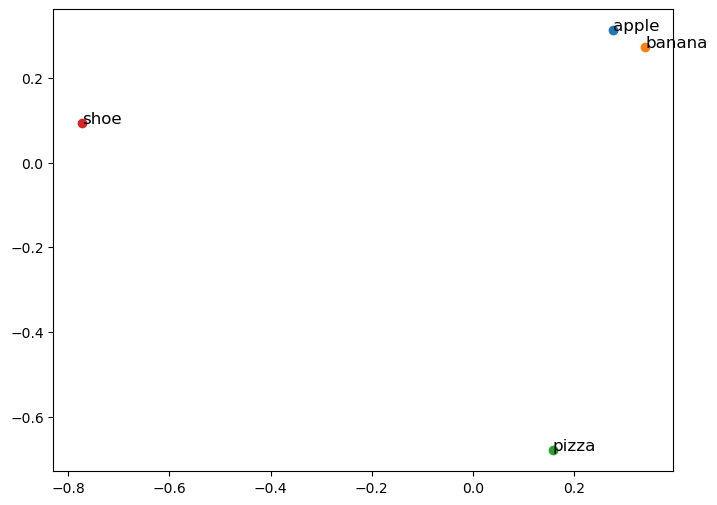

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

for i,word in enumerate(words):
    x,y=reduced_embeddings[i]
    plt.scatter(x,y)
    plt.text(x,y,word,fontsize=12)

## Understand Context

In [20]:
# Define your sentences
sentences = [
    "Where can I buy running shoes for kids?",                         # related
    "Affordable running shoes for boys and girls",                     # related
    "Where Can you find Plants Nursery?",           # related
    "What is the capital of India?",                               # unrelated
    "Photosynthesis helps in creating food in plants?"                          # unrelated
]

1536
1536
1536
1536
1536


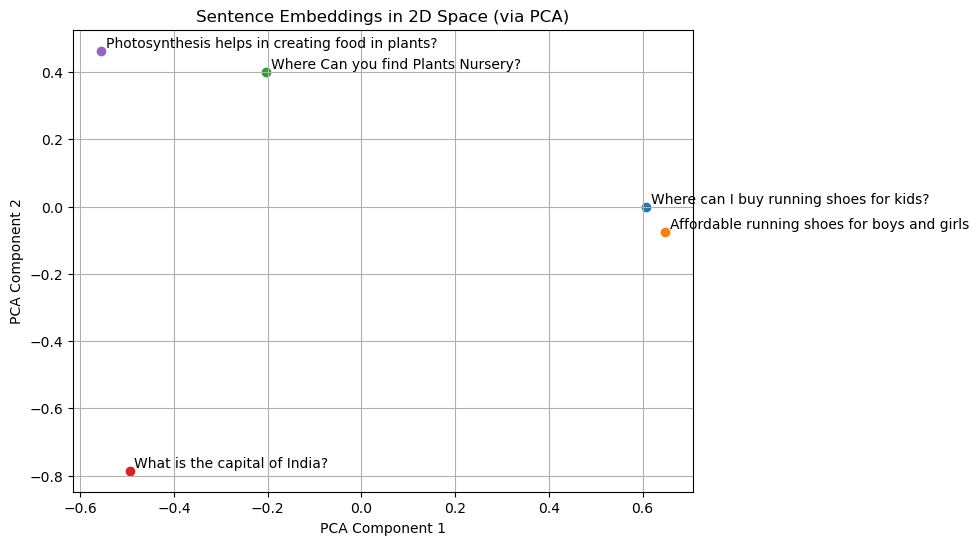

In [21]:

# Get embeddings
embeddings = []
for sentence in sentences:
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=sentence
    )
    embedding = response.data[0].embedding
    print(len(embedding))
    embeddings.append(embedding)

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=10)

plt.title("Sentence Embeddings in 2D Space (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## Simillarity Measure

In [30]:
import numpy as np
from numpy.linalg import norm

In [35]:
def cosine_similarity(vec1,vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

In [ ]:
search_text = "beautiful plants for shopping"

In [39]:
response = client.embeddings.create(
        model="text-embedding-3-small",
        input=search_text
    )
search_embedding=response.data[0].embedding

In [42]:

similarities=[]
for i,sent_embedding in enumerate(embeddings):
    similarity=cosine_similarity(search_embedding,sent_embedding)
    similarities.append((sentences[i],similarity))
similarities

[('Where can I buy running shoes for kids?', 0.20363214467304083),
 ('Affordable running shoes for boys and girls', 0.24836348304804412),
 ('Where Can you find Plants Nursery?', 0.505675787950161),
 ('What is the capital of India?', 0.04290699739412483),
 ('Photosynthesis helps in creating food in plants?', 0.22188525939626128)]

In [43]:
# Sort by similarity score in descending order
similarities.sort(key=lambda x: x[1], reverse=True)
top_match = similarities[0]
print(f"\n🔝 Top Match:\nScore: {top_match[1]:.4f} | Sentence: {top_match[0]}")



🔝 Top Match:
Score: 0.5057 | Sentence: Where Can you find Plants Nursery?
